In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import skdsp.signal.printer as pt
import numpy as np
import sympy as sp
import scipy.signal as cp
import scipy.fftpack as fftp
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

In [2]:
def square(N=8, width=0, offset=0, shift=0, center=True):
    npts = 32
    s = offset + (ds.Square(N, width) >> shift)
    n = np.arange(-npts, npts+1)
    plt.figure(figsize=(20, 7))
    plt.subplot(2, 2, (1, 2))
    plt.stem(n, s[-npts:npts+1], markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.axis([-npts-0.5, npts+0.5, -2.1, 2.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    X = s.dfs()
    X.real[np.isclose(np.real(X), 0)] = 0
    X.imag[np.isclose(np.imag(X), 0)] = 0
    if center:
        X = fftp.fftshift(X)
        kidx = np.arange(-int(N/2), int((N-1)/2)+1)
    else:
        kidx = np.arange(0, N)
    plt.subplot(2, 2, 3)
    mX = np.abs(X)
    plt.stem(kidx, mX)
    min_ = min(0, np.min(mX))
    max_ = np.max(mX)
    dr = (max_ - min_)
    plt.axis([kidx[0]-0.5, kidx[-1]+0.5, min_-0.1*dr, max_+0.1*dr])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)
    plt.subplot(2, 2, 4)
    plt.stem(kidx, np.angle(X))
    plt.axis([kidx[0]-0.5, kidx[-1]+0.5, -np.pi-0.5, np.pi+0.5])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)

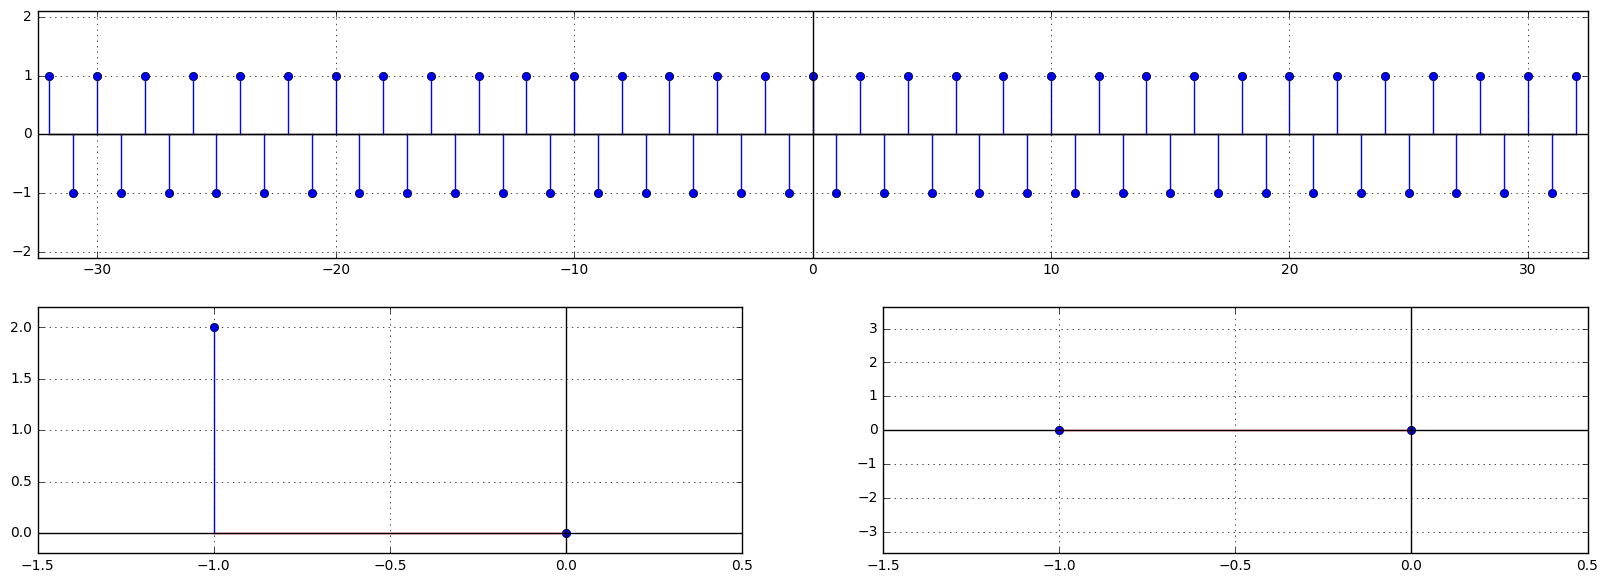

In [3]:
from ipywidgets import interact
interact(square, N=(2, 32, 1), width=(1, 32, 1), offset=(-1, 1, 0.1), shift=(-64, 64, 1), center=True)